# Procesamiento del Lenguaje Natural

## Tarea 01 (práctica 01)

Francisco Pablo Rodrigo

### Configuraciones previas

Se realizan los *imports* necesarios para hacer el análisis de nuestro *corpus*

In [1]:
import nltk
# Corpus en español
from nltk.corpus import cess_esp
# Stopwords en multiples idiomas
from nltk.corpus import stopwords
# Algoritmo de stemming de Porter
# Se importa la implementacion snoball porque 
# soporta el idioma español
from nltk.stem import SnowballStemmer
# Freqdist será de utilidad para medir la 
# frecuencia de los tipos
from nltk.probability import FreqDist

# Imports relacionados con la creación de gráficas
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

Los comandos o instrucciones que solo se ejecutan una vez se muestran comentados. Generalmente corresponde a descargargas o instalación de paquetes

In [2]:
# Esto solo se debe ejecutar una vez para del corpus.
# Se comenta para no descargarlo varias veces por error.
#nltk.download('cess_esp')

In [3]:
# Solo se ejecuta una vez
#nltk.download('stopwords')

### 1. Elección de un corpus

Un **corpus** es una muestra bien organizada del nuestro lenguaje tomada de materiales escritos o hablados y que se encuentran agrupados bajo un críterio común.

Para esta práctica se utilizará un corpus en *español* provisto por la librería de *nltk*, en este caso utilizaremos  **cess_esp**. La recomendación es siempre utilizar un corpus con un lenguaje del que estemos bien familizarizamos, de lo contrario se tendrán problemas para poder analizarlo debido a que no se conocerán a la perfeccción los elementos léxicos y no léxicos, son *stopwords*, etc. En ese sentido debido a nuestra formación y a la semejanza entre idiomas se puede utilizar un corpus en español o inglés sin que estos suponga mucho problema.

In [4]:
# Se trabajara con el formato en palabras, 
# teniendo en cuenta que hay otros formatos como 
# Sentencias o texto
corpus = cess_esp.words()

El tamaño del corpus debe ser de más de *10 000* palabras por lo cual a continuación se imprime el tamaño del corpus elegido

In [5]:
corpus_len = len(corpus)
print ("El tamaño del corpus es {}".format(corpus_len))

El tamaño del corpus es 192686


Se observan las concordancias de las palabras en las que se podría tener duda de como proceder. Se deja simplemente como evidencia futura y no es relevante para la práctica.

In [6]:
#nltk.Text(corpus).concordance("mayo_del_2002")

### 2. Limpiar el corpus: eliminar signos de puntuación, de interrogación, admiración y elementos no léxicos.

Para tener un análisis más limpio de los tipos y morfemas se descartan signos de puntuación y algunos otros elementos no léxicos que se muestran a continuación.

In [7]:
# Se declaran elementos no lexicos con base en el idioma del corpus
non_lexical_list = ['¡','!','?','¿','.',',',';',':','-','_','(',')','""',"'",
                    '-','#','/','&',
                    '$','*','"','-fpa-','-fpt-','*0*','-Fpa-','-Fpt-','-fe-']

Se muestra **el tamaño** del *corpus base* antes de empezar a limpiarlo

In [8]:
len_before_cleaning = len(corpus)
print("Longitud del corpus antes de limpiarlo:", len_before_cleaning)

Longitud del corpus antes de limpiarlo: 192686


**Tamaño** del corpus después de quitar los elementos no léxicos.

In [9]:
# Se crea una nueva lista sin los elementos lexicos
corpus_without_non_lexical = [w.lower() for w in corpus if w not in non_lexical_list]

In [10]:
print(corpus_without_non_lexical[:100])

['el', 'grupo', 'estatal', 'electricité_de_france', 'edf', 'anunció', 'hoy', 'jueves', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'electricidad_águila_de_altamira', 'eaa', 'creada', 'por', 'el', 'japonés', 'mitsubishi_corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', 'una', 'portavoz', 'de', 'edf', 'explicó', 'a', 'efe', 'que', 'el', 'proyecto', 'para', 'la', 'construcción', 'de', 'altamira_2', 'al', 'norte', 'de', 'tampico', 'prevé', 'la', 'utilización', 'de', 'gas', 'natural', 'como', 'combustible', 'principal', 'en', 'una', 'central', 'de', 'ciclo', 'combinado', 'que', 'debe', 'empezar', 'a', 'funcionar', 'en', 'mayo_del_2002', 'la', 'electricidad', 'producida', 'pasará', 'a', 'la', 'red', 'eléctrica', 'pública', 'de', 'méxico', 'en_virtud_de', 'un', 'acuerdo', 'de', 'venta', 'de', 'energía', 'de', 'eaa', 'con', 'la', 'comisión_federal_de_electricidad', 'cfe', 'por', 'una', 'duración']


In [11]:
# Calculando el nuevo tamaño del corpus
len_after_cleaning = len(corpus_without_non_lexical)
print("Longitud del corpus después de limpiarlo", len_after_cleaning)

Longitud del corpus después de limpiarlo 164689


A continuación se imprimen el número de elementos no léxicos descartados

In [12]:
non_lexical_count = len_before_cleaning - len_after_cleaning
print("Se contraron {} elementos no léxicos".format(non_lexical_count))

Se contraron 27997 elementos no léxicos


### 3. Eliminar las stopwords

Las preposiciones, artículos y pronombres generalmente no aportan mucha información a la hora de realizar un análisis de PLN, a dichos elementos se les conoce como **stopwords** y es necesario removerlos antes de obtener las frecuencias de cada tipo.

In [13]:
# Utilizamos las stopwords proporcionadas por nltk
stopwords_list = stopwords.words('spanish')

print(stopwords_list[:100])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo']


In [14]:
def remove_stopwords(corpus):
    return [w for w in corpus if w not in stopwords_list]

corpus_without_stopwords = remove_stopwords(corpus_without_non_lexical)

Veamos ahora el tamaño del corpus sin stopwords

In [15]:
print("El tamaño del corpus sin stopwords es de {}".format(len(corpus_without_stopwords)))

El tamaño del corpus sin stopwords es de 86629


### 4. Aplicar un algoritmo de Stemming a los tokens limpios

El proceso de **stemming**, también conocido como *truncamiento* consiste en reducri un token a un suspuesta *base*. Este proceso se logra truncando los *afijos* correspondientes.

Además, el *truncamiento* es *muy similar* al parseo **morfológico** con la diferencia de que el  stemming maapia los afijos a elementos nulos.

El algoritmo de **Porter** es uno de los más famosos para realizar *stemming*, dicho algoritmo se basa en la utilización de regiones y críterios para encontrar la base de un token dado.

Existen varias implementaciónes de dicho algoritmo. La principal diferencia es en cuanto a los ajustes que se le deben hacer dependiendo del *lenguaje* a analizar. 

Para la versión en **español** se utiliza la implementación conocida como **SnowballStemmer**.

In [16]:
# Se confirma el steemer en español
stemmer = SnowballStemmer("spanish") 

# Arreglo para guardar el corpus una vez realizado el stemming
stemmed_corpus = []

for w in corpus_without_stopwords:
    stemmed_corpus.append(stemmer.stem(w))


In [17]:
print(stemmed_corpus[:100])

['grup', 'estatal', 'electricite_de_franc', 'edf', 'anunc', 'hoy', 'juev', 'compr', '51_por_cient', 'empres', 'mexican', 'electricidad_aguila_de_altamir', 'eaa', 'cre', 'japones', 'mitsubishi_corporation', 'poner_en_march', 'central', 'gas', '495', 'megavati', 'portavoz', 'edf', 'explic', 'efe', 'proyect', 'construccion', 'altamira_2', 'nort', 'tampic', 'prev', 'utiliz', 'gas', 'natural', 'combust', 'principal', 'central', 'cicl', 'combin', 'deb', 'empez', 'funcion', 'mayo_del_2002', 'electr', 'produc', 'pas', 'red', 'electr', 'public', 'mexic', 'en_virtud_d', 'acuerd', 'vent', 'energ', 'eaa', 'comision_federal_de_electr', 'cfe', 'duracion', '25', 'años', 'edf', 'quis', 'revel', 'cuant', 'pag', 'particip', 'mayoritari', 'eaa', 'intervendr', 'asistent', 'construccion', 'altamira_2', 'posterior', 'encarg', 'explot', 'principal', 'accion', 'edf', 'mitsubishi', 'particip', '1998', 'licit', 'licenci', 'constru', 'central', 'electr', 'mexic', 'qued', 'dos', 'cad', 'rio_brav', 'saltill', 'com

### 5. Obtener la lista de tipos por orden de frecuencia (de mayor frecuencia a menor frecuencia)

Los tipos son los tokens no repetidos.

Para encontrarlos podemos hacer 2 cosas

* Convertir la lista de corpus a un conjunto
* Utilizar la función FreqDist que hace el 
conteo de tokens de manera automática

En este caso utilizaremos la *segunda* opción.

In [18]:
tokens = corpus_without_stopwords

# Se crea un diccionario
# llave: palabra
# valor: ocurrencias
freq_tokens = FreqDist(tokens)

# Se transforma el diccionario 
# para ordenarlo de mayor a menor frecuencia
sorted_freq_tokens = dict(sorted(freq_tokens.items(), 
                                 key = lambda item: item[1],reverse=True))


La siguiente opción esta comentada por legibilidad pero es válida. Solo que muestra todo el diccionario, sin la posiblidad de mostrar solo una parte del contenido.

In [19]:
# Se comenta esta linea para hacer la impresion más limpia
# por medio de una función de FreqDist como se muestra
# en la siguiente celda
#print(sorted_freq_tokens)

Utiliando la segunda opción para imprimir los tipos por frecuencia

In [20]:
# Se imprimen los primeros 30 tokens en orden de frecuencia
freq_tokens.most_common(30)

[('hoy', 357),
 ('dos', 313),
 ('años', 291),
 ('si', 266),
 ('ser', 226),
 ('presidente', 223),
 ('gobierno', 222),
 ('según', 204),
 ('millones', 195),
 ('dijo', 184),
 ('país', 177),
 ('aunque', 175),
 ('puede', 163),
 ('año', 158),
 ('sólo', 153),
 ('después', 153),
 ('partido', 150),
 ('sido', 150),
 ('hace', 149),
 ('ahora', 146),
 ('equipo', 145),
 ('pasado', 141),
 ('tras', 136),
 ('tres', 134),
 ('mundo', 124),
 ('cada', 122),
 ('primera', 119),
 ('vida', 115),
 ('tiempo', 113),
 ('primer', 111)]

Se gráfica la frecuencia de los primeros 40 *tipos*. La información mostrada es más fácil de digerir dado que se ve gráficante que *tipos* se utilizan más.

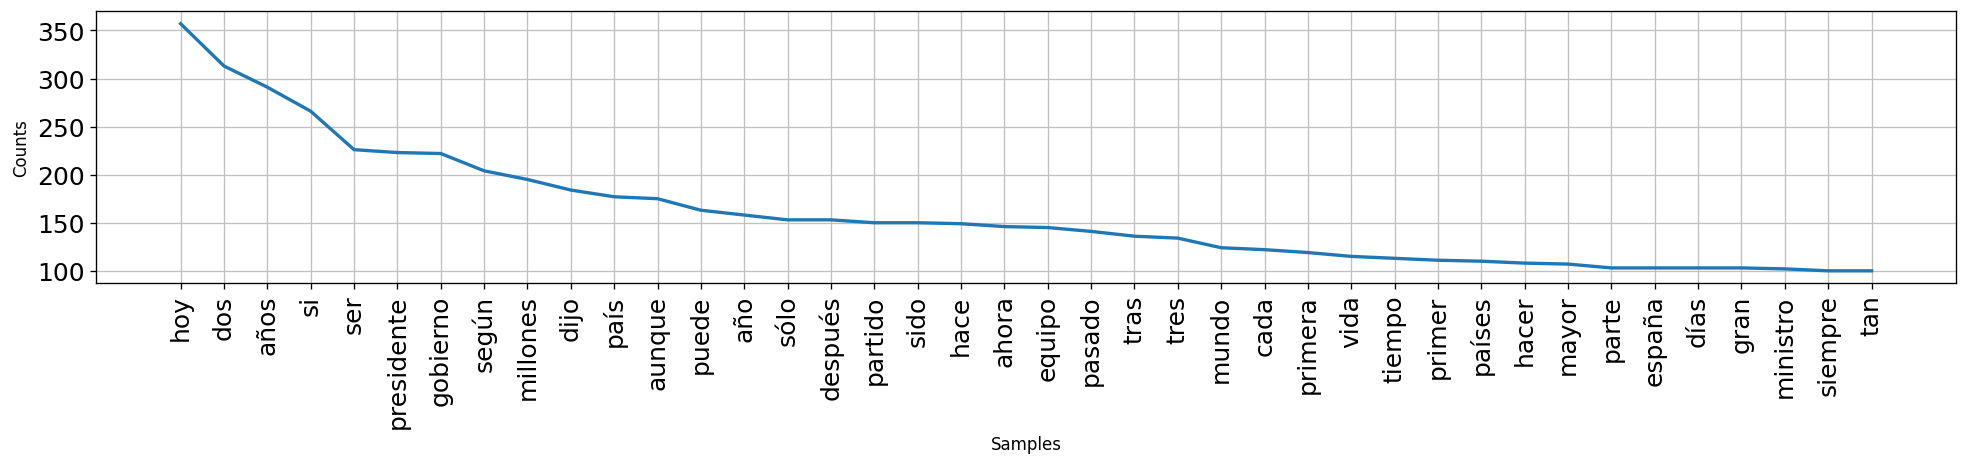

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
plt.figure(figsize=(20,3),dpi=120)
plt.xticks(size=15)
plt.yticks(size=15)
freq_tokens.plot(40)

Se crea una **nube de palabras** con los tipos (previamente procesados: sin stopwords ni elementos no léxicos)

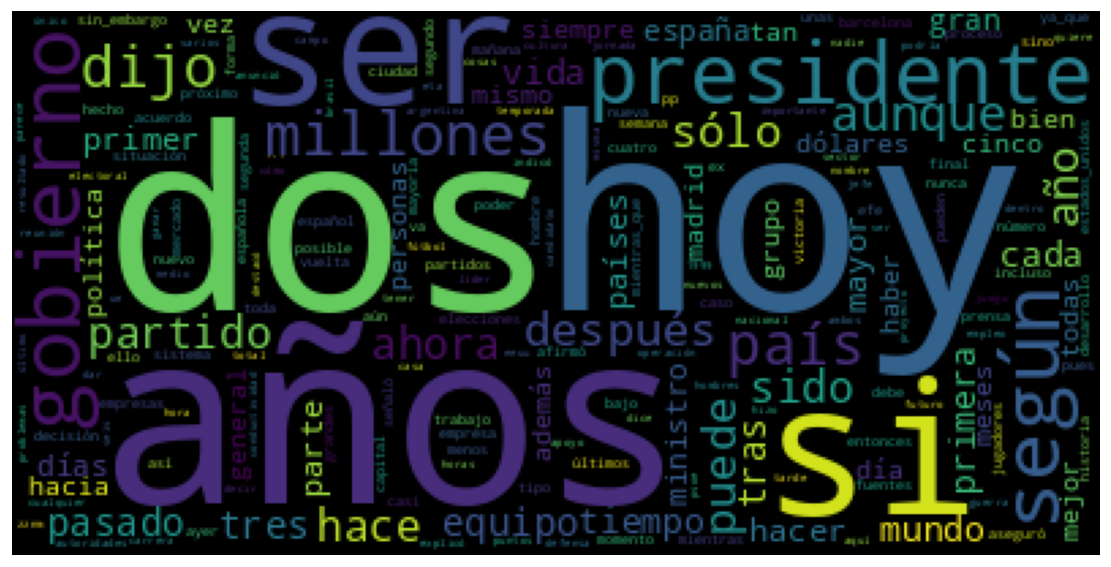

In [22]:
mycloud = WordCloud()

mycloud.generate_from_frequencies(Counter(tokens))

plt.figure(figsize=(14,6), dpi=120)
plt.imshow(mycloud)
plt.axis("off")
plt.show()